✅ Data loaded successfully!
Dataset Shape: (50000, 11)

=== BMW SALES DATA ANALYSIS ===

📊 BASIC DATASET INFORMATION
Shape: (50000, 11) (rows, columns)
Columns: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

🔍 DATA QUALITY CHECK
Missing values per column:
No missing values found!
Duplicate rows: 0

📝 Unique values in categorical columns:
  Model: 11 unique values
  Region: 6 unique values
  Color: 6 unique values
  Fuel_Type: 4 unique values
  Transmission: 2 unique values
  Sales_Classification: 2 unique values

📈 BASIC STATISTICS
Numerical columns statistics:
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010

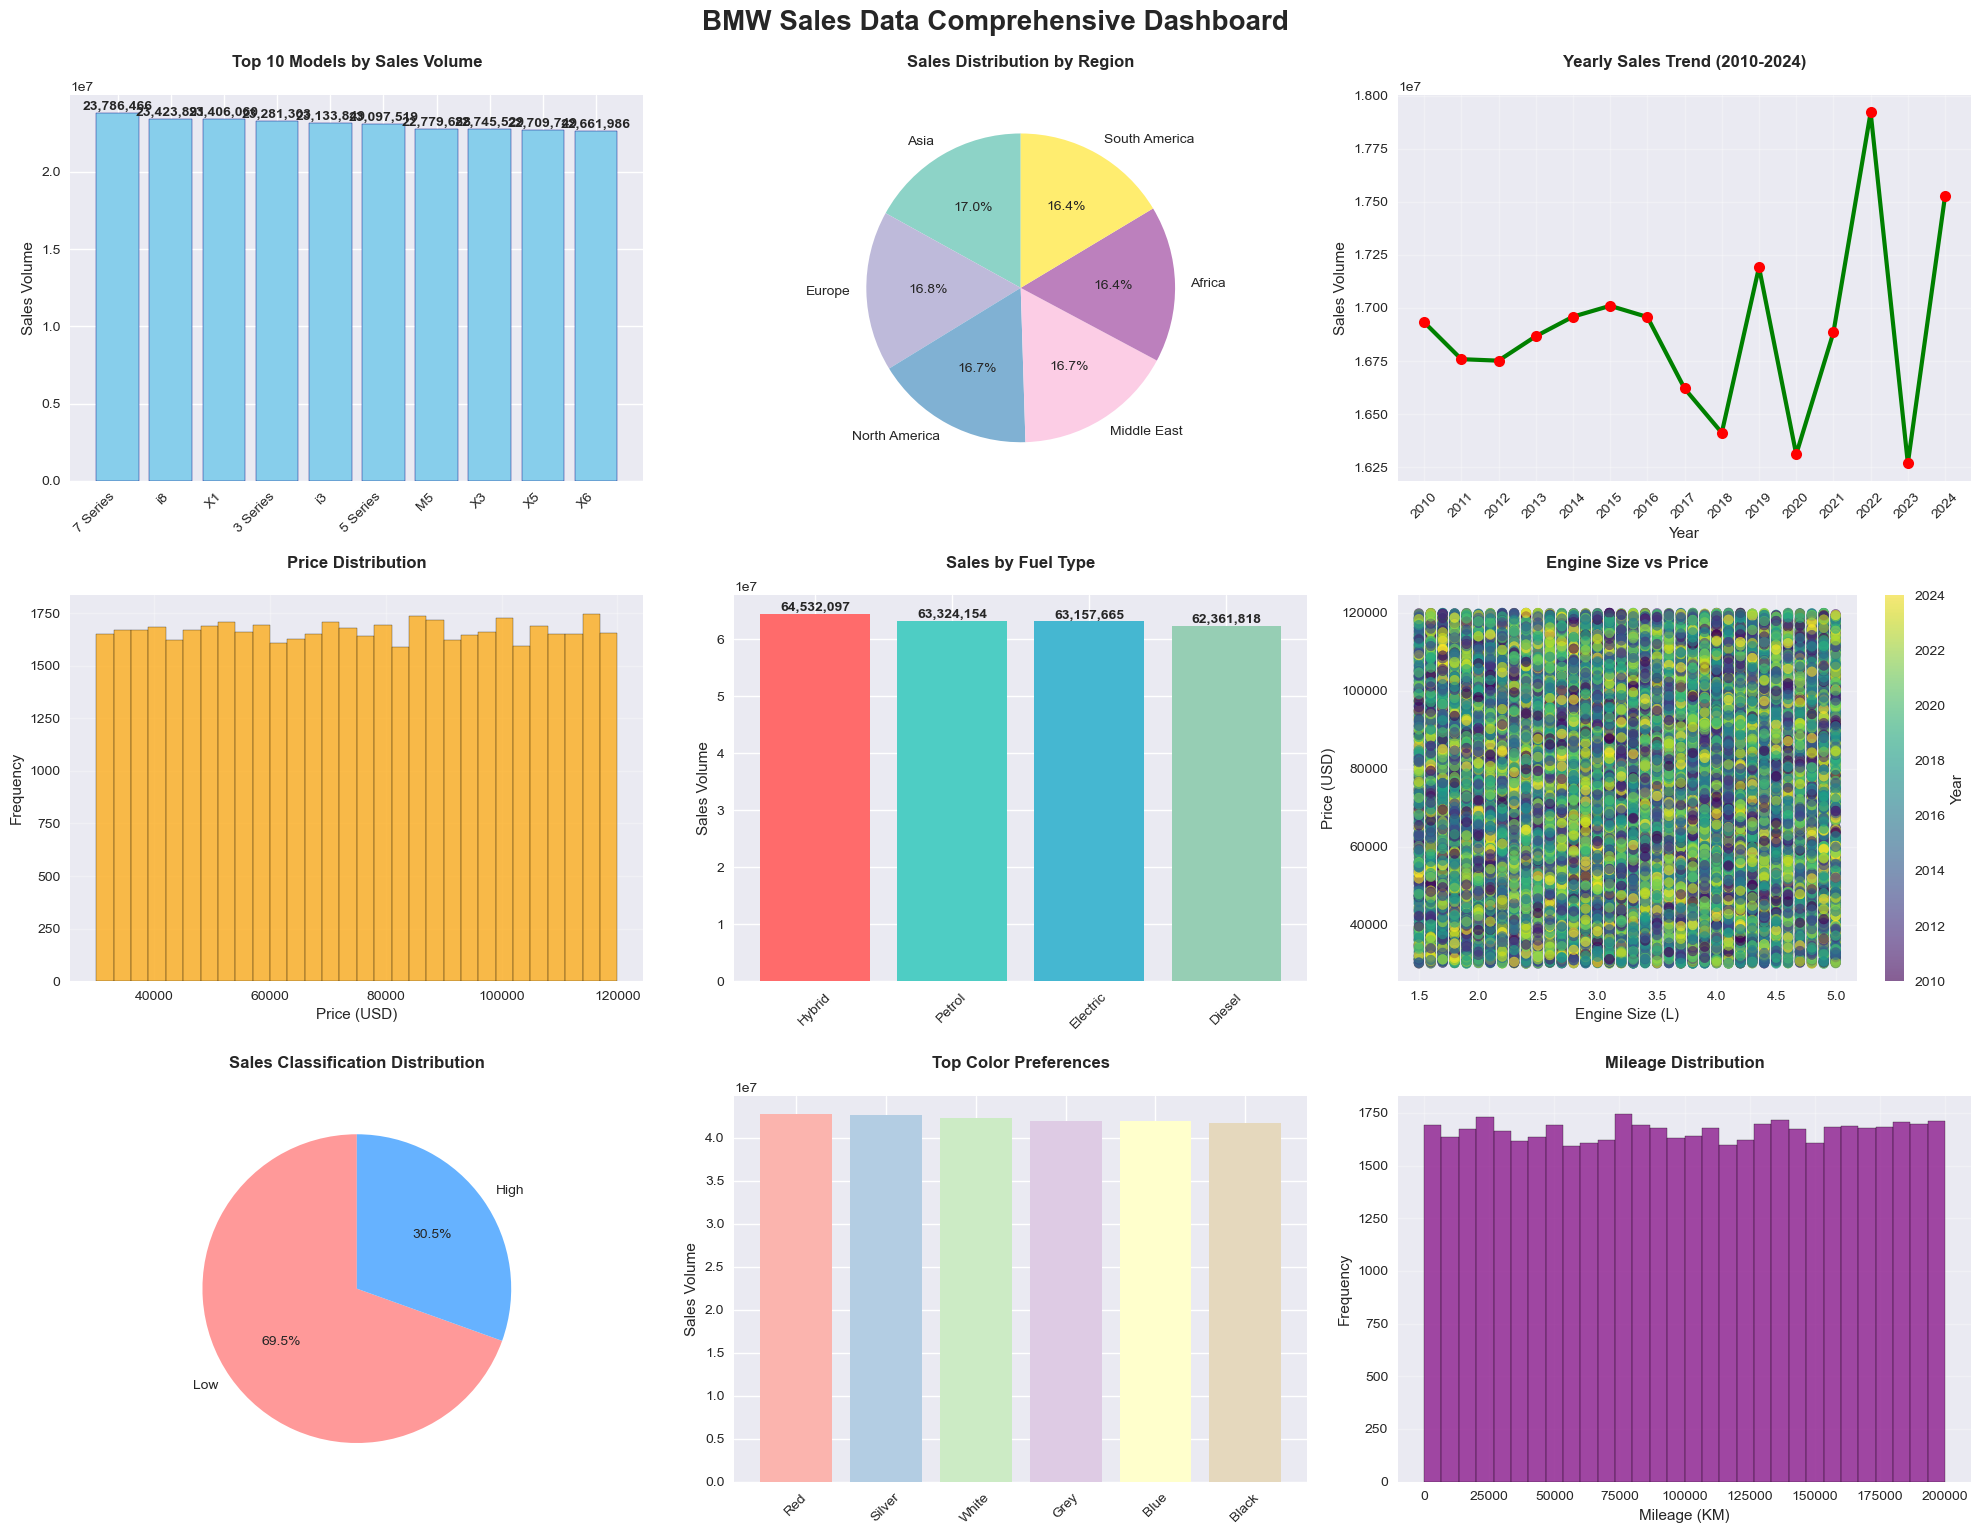


🔗 CORRELATION ANALYSIS


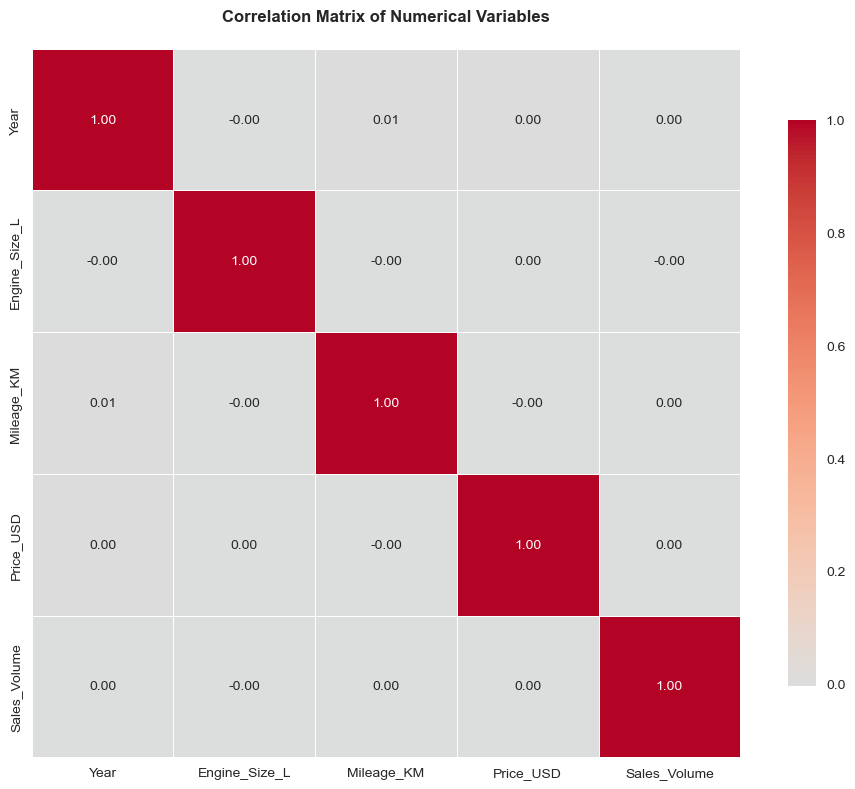

Correlation Matrix:
                Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Year           1.000         -0.002       0.009      0.004         0.002
Engine_Size_L -0.002          1.000      -0.005      0.000        -0.004
Mileage_KM     0.009         -0.005       1.000     -0.004         0.001
Price_USD      0.004          0.000      -0.004      1.000         0.000
Sales_Volume   0.002         -0.004       0.001      0.000         1.000

📈 TREND ANALYSIS


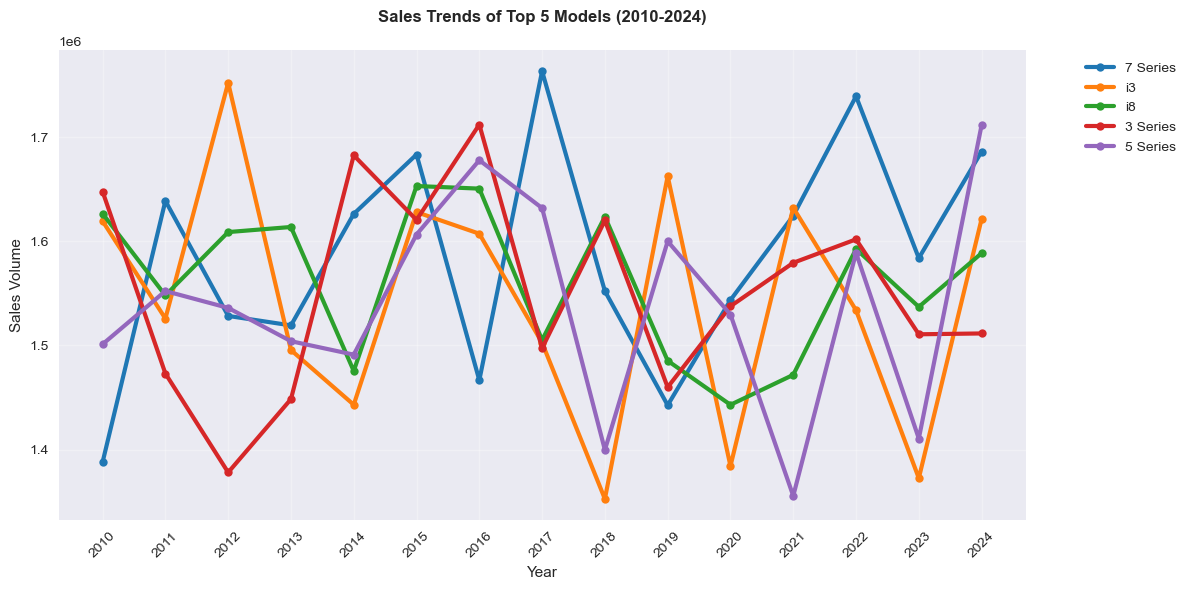


💡 ADVANCED INSIGHTS
📊 High Sales entries: 15,246
📊 Low Sales entries: 34,754

💰 Average price - High sales: $74,966.82
💰 Average price - Low sales: $75,064.34
💰 Price difference: $-97.52

🛣️ Average mileage - High sales: 100,883 KM
🛣️ Average mileage - Low sales: 100,055 KM
🛣️ Mileage difference: 828 KM

🌎 Top Model in each Region:
  Asia                 → X1              (42,974,277 units)
  North America        → 7 Series        (42,402,629 units)
  Middle East          → 7 Series        (42,326,620 units)
  South America        → X6              (41,551,818 units)
  Europe               → i8              (42,555,138 units)
  Africa               → 5 Series        (41,565,252 units)

🎯 KEY FINDINGS AND CONCLUSIONS

1. 🚀 SALES PERFORMANCE:
   • Total sales volume: 253,375,734 units
   • Best performing year: 2022 with 17,920,946 units
   • Top selling model: 7 Series with 23,786,466 units

2. 💰 PRICING INSIGHTS:
   • Average vehicle price: $75,034.60
   • Price range: $30,000.00 - $1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data with your specific file path
file_path = r"C:\Users\FrankJR\Downloads\Portfolio\Business Analyst\BMW Worldwide Sales Records (2010–2024)\BMW sales data (2010-2024).csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
    print(f"Dataset Shape: {df.shape}")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"❌ Error loading file: {e}")
    exit()

print("\n" + "="*60)
print("=== BMW SALES DATA ANALYSIS ===")
print("="*60)

# Display basic info about the dataset
print("\n📊 BASIC DATASET INFORMATION")
print(f"Shape: {df.shape} (rows, columns)")
print(f"Columns: {df.columns.tolist()}\n")

# 1. DATA QUALITY CHECK
print("🔍 DATA QUALITY CHECK")
print("Missing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found!")

print(f"Duplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print("\n📝 Unique values in categorical columns:")
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} unique values")

print("\n" + "="*60)

# 2. BASIC STATISTICAL ANALYSIS
print("📈 BASIC STATISTICS")
print("Numerical columns statistics:")
numeric_stats = df[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']].describe()
print(numeric_stats)

print("\n" + "="*60)

# 3. SALES PERFORMANCE BY CATEGORY
print("🚀 SALES PERFORMANCE ANALYSIS")

# Sales by Model
print("\n🏆 Top 10 Models by Sales Volume:")
model_sales = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
top_10_models = model_sales.head(10)
for i, (model, sales) in enumerate(top_10_models.items(), 1):
    print(f"  {i:2d}. {model:15} {sales:>8,} units")

# Sales by Region
print("\n🌍 Sales by Region:")
region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
for region, sales in region_sales.items():
    print(f"  {region:20} {sales:>8,} units")

# Sales by Year
print("\n📅 Sales by Year:")
yearly_sales = df.groupby('Year')['Sales_Volume'].sum()
for year, sales in yearly_sales.items():
    print(f"  {year}: {sales:>8,} units")

print("\n" + "="*60)

# 4. PRICE ANALYSIS
print("💰 PRICE ANALYSIS")
print(f"Average Price: ${df['Price_USD'].mean():,.2f}")
print(f"Median Price: ${df['Price_USD'].median():,.2f}")
print(f"Highest Price: ${df['Price_USD'].max():,.2f}")
print(f"Lowest Price: ${df['Price_USD'].min():,.2f}")

# Price by Model
print("\n💎 Average Price by Model (Top 10):")
price_by_model = df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False)
top_10_prices = price_by_model.head(10)
for i, (model, price) in enumerate(top_10_prices.items(), 1):
    print(f"  {i:2d}. {model:15} ${price:>10,.2f}")

print("\n" + "="*60)

# 5. FUEL TYPE AND TRANSMISSION ANALYSIS
print("⛽ FUEL TYPE & TRANSMISSION ANALYSIS")
print("Sales by Fuel Type:")
fuel_sales = df.groupby('Fuel_Type')['Sales_Volume'].sum().sort_values(ascending=False)
for fuel, sales in fuel_sales.items():
    print(f"  {fuel:15} {sales:>8,} units")

print("\n⚙️ Sales by Transmission:")
transmission_sales = df.groupby('Transmission')['Sales_Volume'].sum().sort_values(ascending=False)
for transmission, sales in transmission_sales.items():
    print(f"  {transmission:15} {sales:>8,} units")

print("\n" + "="*60)

# 6. SALES CLASSIFICATION ANALYSIS
print("🎯 SALES CLASSIFICATION ANALYSIS")
classification_stats = df.groupby('Sales_Classification').agg({
    'Sales_Volume': ['count', 'sum', 'mean'],
    'Price_USD': ['mean', 'median']
}).round(2)

print("Performance by Sales Classification:")
print(classification_stats)

print("\n" + "="*60)

# VISUALIZATION SECTION
print("📊 CREATING VISUALIZATIONS...")

# Create comprehensive dashboard
plt.figure(figsize=(20, 15))

# 1. Sales by Model (Top 10)
plt.subplot(3, 3, 1)
top_models = model_sales.head(10)
bars = plt.bar(range(len(top_models)), top_models.values, color='skyblue', edgecolor='navy')
plt.title('Top 10 Models by Sales Volume', fontweight='bold', pad=20)
plt.xticks(range(len(top_models)), top_models.index, rotation=45, ha='right')
plt.ylabel('Sales Volume')
# Add value labels on bars
for bar, value in zip(bars, top_models.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:,}', 
             ha='center', va='bottom', fontweight='bold')

# 2. Sales by Region
plt.subplot(3, 3, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(region_sales)))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Sales Distribution by Region', fontweight='bold', pad=20)

# 3. Yearly Sales Trend
plt.subplot(3, 3, 3)
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=3, 
         markersize=8, color='green', markerfacecolor='red')
plt.title('Yearly Sales Trend (2010-2024)', fontweight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_sales.index, rotation=45)

# 4. Price Distribution
plt.subplot(3, 3, 4)
plt.hist(df['Price_USD'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Price Distribution', fontweight='bold', pad=20)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 5. Sales by Fuel Type
plt.subplot(3, 3, 5)
fuel_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
fuel_bars = plt.bar(range(len(fuel_sales)), fuel_sales.values, color=fuel_colors[:len(fuel_sales)])
plt.title('Sales by Fuel Type', fontweight='bold', pad=20)
plt.xticks(range(len(fuel_sales)), fuel_sales.index, rotation=45)
plt.ylabel('Sales Volume')
# Add value labels
for bar, value in zip(fuel_bars, fuel_sales.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:,}', 
             ha='center', va='bottom', fontweight='bold')

# 6. Engine Size vs Price
plt.subplot(3, 3, 6)
plt.scatter(df['Engine_Size_L'], df['Price_USD'], alpha=0.6, c=df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('Engine Size vs Price', fontweight='bold', pad=20)
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

# 7. Sales Classification Distribution
plt.subplot(3, 3, 7)
classification_count = df['Sales_Classification'].value_counts()
plt.pie(classification_count.values, labels=classification_count.index, autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Sales Classification Distribution', fontweight='bold', pad=20)

# 8. Color Preference
plt.subplot(3, 3, 8)
color_sales = df.groupby('Color')['Sales_Volume'].sum().sort_values(ascending=False)
color_bars = plt.bar(range(len(color_sales.head(8))), color_sales.head(8).values, 
                    color=plt.cm.Pastel1(np.linspace(0, 1, 8)))
plt.title('Top Color Preferences', fontweight='bold', pad=20)
plt.xticks(range(len(color_sales.head(8))), color_sales.head(8).index, rotation=45)
plt.ylabel('Sales Volume')

# 9. Mileage Distribution
plt.subplot(3, 3, 9)
plt.hist(df['Mileage_KM'], bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.title('Mileage Distribution', fontweight='bold', pad=20)
plt.xlabel('Mileage (KM)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('BMW Sales Data Comprehensive Dashboard', fontsize=20, fontweight='bold', y=1.02)
plt.show()

# CORRELATION ANALYSIS
print("\n" + "="*60)
print("🔗 CORRELATION ANALYSIS")

numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

print("\n" + "="*60)

# TREND ANALYSIS
print("📈 TREND ANALYSIS")

# Model popularity over years
popular_models = df['Model'].value_counts().head(5).index
model_trends = df[df['Model'].isin(popular_models)].pivot_table(
    index='Year', columns='Model', values='Sales_Volume', aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, model in enumerate(popular_models):
    plt.plot(model_trends.index, model_trends[model], marker='o', label=model, 
             linewidth=3, markersize=6, color=colors[i])

plt.title('Sales Trends of Top 5 Models (2010-2024)', fontweight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(model_trends.index, rotation=45)
plt.tight_layout()
plt.show()

# ADVANCED INSIGHTS
print("\n" + "="*60)
print("💡 ADVANCED INSIGHTS")

# High vs Low sales analysis
high_sales = df[df['Sales_Classification'] == 'High']
low_sales = df[df['Sales_Classification'] == 'Low']

print(f"📊 High Sales entries: {len(high_sales):,}")
print(f"📊 Low Sales entries: {len(low_sales):,}")

print(f"\n💰 Average price - High sales: ${high_sales['Price_USD'].mean():,.2f}")
print(f"💰 Average price - Low sales: ${low_sales['Price_USD'].mean():,.2f}")
price_diff = high_sales['Price_USD'].mean() - low_sales['Price_USD'].mean()
print(f"💰 Price difference: ${price_diff:,.2f}")

print(f"\n🛣️ Average mileage - High sales: {high_sales['Mileage_KM'].mean():,.0f} KM")
print(f"🛣️ Average mileage - Low sales: {low_sales['Mileage_KM'].mean():,.0f} KM")
mileage_diff = high_sales['Mileage_KM'].mean() - low_sales['Mileage_KM'].mean()
print(f"🛣️ Mileage difference: {mileage_diff:,.0f} KM")

# Regional preferences
print("\n🌎 Top Model in each Region:")
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    top_model = region_data.groupby('Model')['Sales_Volume'].sum().idxmax()
    total_sales = region_data['Sales_Volume'].sum()
    print(f"  {region:20} → {top_model:15} ({total_sales:>8,} units)")

print("\n" + "="*60)

# SUMMARY AND CONCLUSIONS
print("🎯 KEY FINDINGS AND CONCLUSIONS")

print("\n1. 🚀 SALES PERFORMANCE:")
print(f"   • Total sales volume: {df['Sales_Volume'].sum():,} units")
best_year = yearly_sales.idxmax()
print(f"   • Best performing year: {best_year} with {yearly_sales.max():,} units")
print(f"   • Top selling model: {model_sales.index[0]} with {model_sales.iloc[0]:,} units")

print("\n2. 💰 PRICING INSIGHTS:")
print(f"   • Average vehicle price: ${df['Price_USD'].mean():,.2f}")
print(f"   • Price range: ${df['Price_USD'].min():,.2f} - ${df['Price_USD'].max():,.2f}")
print(f"   • Most expensive model: {price_by_model.index[0]} at ${price_by_model.iloc[0]:,.2f}")

print("\n3. 🌍 MARKET PREFERENCES:")
print(f"   • Most popular fuel type: {fuel_sales.index[0]}")
print(f"   • Preferred transmission: {transmission_sales.index[0]}")
print(f"   • Top region: {region_sales.index[0]} with {region_sales.iloc[0]:,} units")
print(f"   • Most popular color: {color_sales.index[0]}")

print("\n4. 📊 SALES CLASSIFICATION:")
print(f"   • High sales vehicles: {len(high_sales):,}")
print(f"   • Low sales vehicles: {len(low_sales):,}")
print(f"   • High sales vehicles are typically ${price_diff:,.2f} {'more' if price_diff > 0 else 'less'} expensive")

print("\n5. 🔗 CORRELATION INSIGHTS:")
corr_engine_price = correlation_matrix.loc['Engine_Size_L', 'Price_USD']
corr_mileage_price = correlation_matrix.loc['Mileage_KM', 'Price_USD']
print(f"   • Engine Size vs Price correlation: {corr_engine_price:.3f} ({'Strong' if abs(corr_engine_price) > 0.5 else 'Moderate' if abs(corr_engine_price) > 0.3 else 'Weak'} {'positive' if corr_engine_price > 0 else 'negative'})")
print(f"   • Mileage vs Price correlation: {corr_mileage_price:.3f} ({'Strong' if abs(corr_mileage_price) > 0.5 else 'Moderate' if abs(corr_mileage_price) > 0.3 else 'Weak'} {'positive' if corr_mileage_price > 0 else 'negative'})")

print("\n6. 📈 TREND INSIGHTS:")
sales_growth = ((yearly_sales.iloc[-1] - yearly_sales.iloc[0]) / yearly_sales.iloc[0]) * 100
print(f"   • Overall sales growth (2010-2024): {sales_growth:+.1f}%")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)

In [4]:
# 1. DATA QUALITY CHECK
print("🔍 DATA QUALITY CHECK")
print("Missing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found!")

print(f"Duplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print("\n📝 Unique values in categorical columns:")
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} unique values")

print("\n" + "="*60)

🔍 DATA QUALITY CHECK
Missing values per column:
No missing values found!
Duplicate rows: 0

📝 Unique values in categorical columns:
  Model: 11 unique values
  Region: 6 unique values
  Color: 6 unique values
  Fuel_Type: 4 unique values
  Transmission: 2 unique values
  Sales_Classification: 2 unique values



In [5]:
# 2. BASIC STATISTICAL ANALYSIS
print("📈 BASIC STATISTICS")
print("Numerical columns statistics:")
numeric_stats = df[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']].describe()
print(numeric_stats)

print("\n" + "="*60)

📈 BASIC STATISTICS
Numerical columns statistics:
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000



In [6]:
# 3. SALES PERFORMANCE BY CATEGORY
print("🚀 SALES PERFORMANCE ANALYSIS")

# Sales by Model
print("\n🏆 Top 10 Models by Sales Volume:")
model_sales = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
top_10_models = model_sales.head(10)
for i, (model, sales) in enumerate(top_10_models.items(), 1):
    print(f"  {i:2d}. {model:15} {sales:>8,} units")

# Sales by Region
print("\n🌍 Sales by Region:")
region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
for region, sales in region_sales.items():
    print(f"  {region:20} {sales:>8,} units")

# Sales by Year
print("\n📅 Sales by Year:")
yearly_sales = df.groupby('Year')['Sales_Volume'].sum()
for year, sales in yearly_sales.items():
    print(f"  {year}: {sales:>8,} units")

print("\n" + "="*60)

🚀 SALES PERFORMANCE ANALYSIS

🏆 Top 10 Models by Sales Volume:
   1. 7 Series        23,786,466 units
   2. i8              23,423,891 units
   3. X1              23,406,060 units
   4. 3 Series        23,281,303 units
   5. i3              23,133,849 units
   6. 5 Series        23,097,519 units
   7. M5              22,779,688 units
   8. X3              22,745,529 units
   9. X5              22,709,749 units
  10. X6              22,661,986 units

🌍 Sales by Region:
  Asia                 42,974,277 units
  Europe               42,555,138 units
  North America        42,402,629 units
  Middle East          42,326,620 units
  Africa               41,565,252 units
  South America        41,551,818 units

📅 Sales by Year:
  2010: 16,933,445 units
  2011: 16,758,941 units
  2012: 16,751,895 units
  2013: 16,866,733 units
  2014: 16,958,960 units
  2015: 17,010,207 units
  2016: 16,957,550 units
  2017: 16,620,811 units
  2018: 16,412,273 units
  2019: 17,191,956 units
  2020: 16,310,843 

In [7]:
# 4. PRICE ANALYSIS
print("💰 PRICE ANALYSIS")
print(f"Average Price: ${df['Price_USD'].mean():,.2f}")
print(f"Median Price: ${df['Price_USD'].median():,.2f}")
print(f"Highest Price: ${df['Price_USD'].max():,.2f}")
print(f"Lowest Price: ${df['Price_USD'].min():,.2f}")

# Price by Model
print("\n💎 Average Price by Model (Top 10):")
price_by_model = df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False)
top_10_prices = price_by_model.head(10)
for i, (model, price) in enumerate(top_10_prices.items(), 1):
    print(f"  {i:2d}. {model:15} ${price:>10,.2f}")

print("\n" + "="*60)

💰 PRICE ANALYSIS
Average Price: $75,034.60
Median Price: $75,011.50
Highest Price: $119,998.00
Lowest Price: $30,000.00

💎 Average Price by Model (Top 10):
   1. 7 Series        $ 75,570.20
   2. 3 Series        $ 75,566.23
   3. i8              $ 75,366.27
   4. 5 Series        $ 75,287.84
   5. X1              $ 75,262.22
   6. X3              $ 75,016.62
   7. M3              $ 74,841.59
   8. i3              $ 74,800.27
   9. X5              $ 74,708.12
  10. M5              $ 74,474.93



In [8]:
# 5. FUEL TYPE AND TRANSMISSION ANALYSIS
print("⛽ FUEL TYPE & TRANSMISSION ANALYSIS")
print("Sales by Fuel Type:")
fuel_sales = df.groupby('Fuel_Type')['Sales_Volume'].sum().sort_values(ascending=False)
for fuel, sales in fuel_sales.items():
    print(f"  {fuel:15} {sales:>8,} units")

print("\n⚙️ Sales by Transmission:")
transmission_sales = df.groupby('Transmission')['Sales_Volume'].sum().sort_values(ascending=False)
for transmission, sales in transmission_sales.items():
    print(f"  {transmission:15} {sales:>8,} units")

print("\n" + "="*60)

⛽ FUEL TYPE & TRANSMISSION ANALYSIS
Sales by Fuel Type:
  Hybrid          64,532,097 units
  Petrol          63,324,154 units
  Electric        63,157,665 units
  Diesel          62,361,818 units

⚙️ Sales by Transmission:
  Manual          127,362,077 units
  Automatic       126,013,657 units



In [9]:
# 6. SALES CLASSIFICATION ANALYSIS
print("🎯 SALES CLASSIFICATION ANALYSIS")
classification_stats = df.groupby('Sales_Classification').agg({
    'Sales_Volume': ['count', 'sum', 'mean'],
    'Price_USD': ['mean', 'median']
}).round(2)

print("Performance by Sales Classification:")
print(classification_stats)

print("\n" + "="*60)

🎯 SALES CLASSIFICATION ANALYSIS
Performance by Sales Classification:
                     Sales_Volume                     Price_USD         
                            count        sum     mean      mean   median
Sales_Classification                                                    
High                        15246  129552829  8497.50  74966.82  75046.5
Low                         34754  123822905  3562.84  75064.34  75002.5



📊 CREATING VISUALIZATIONS...


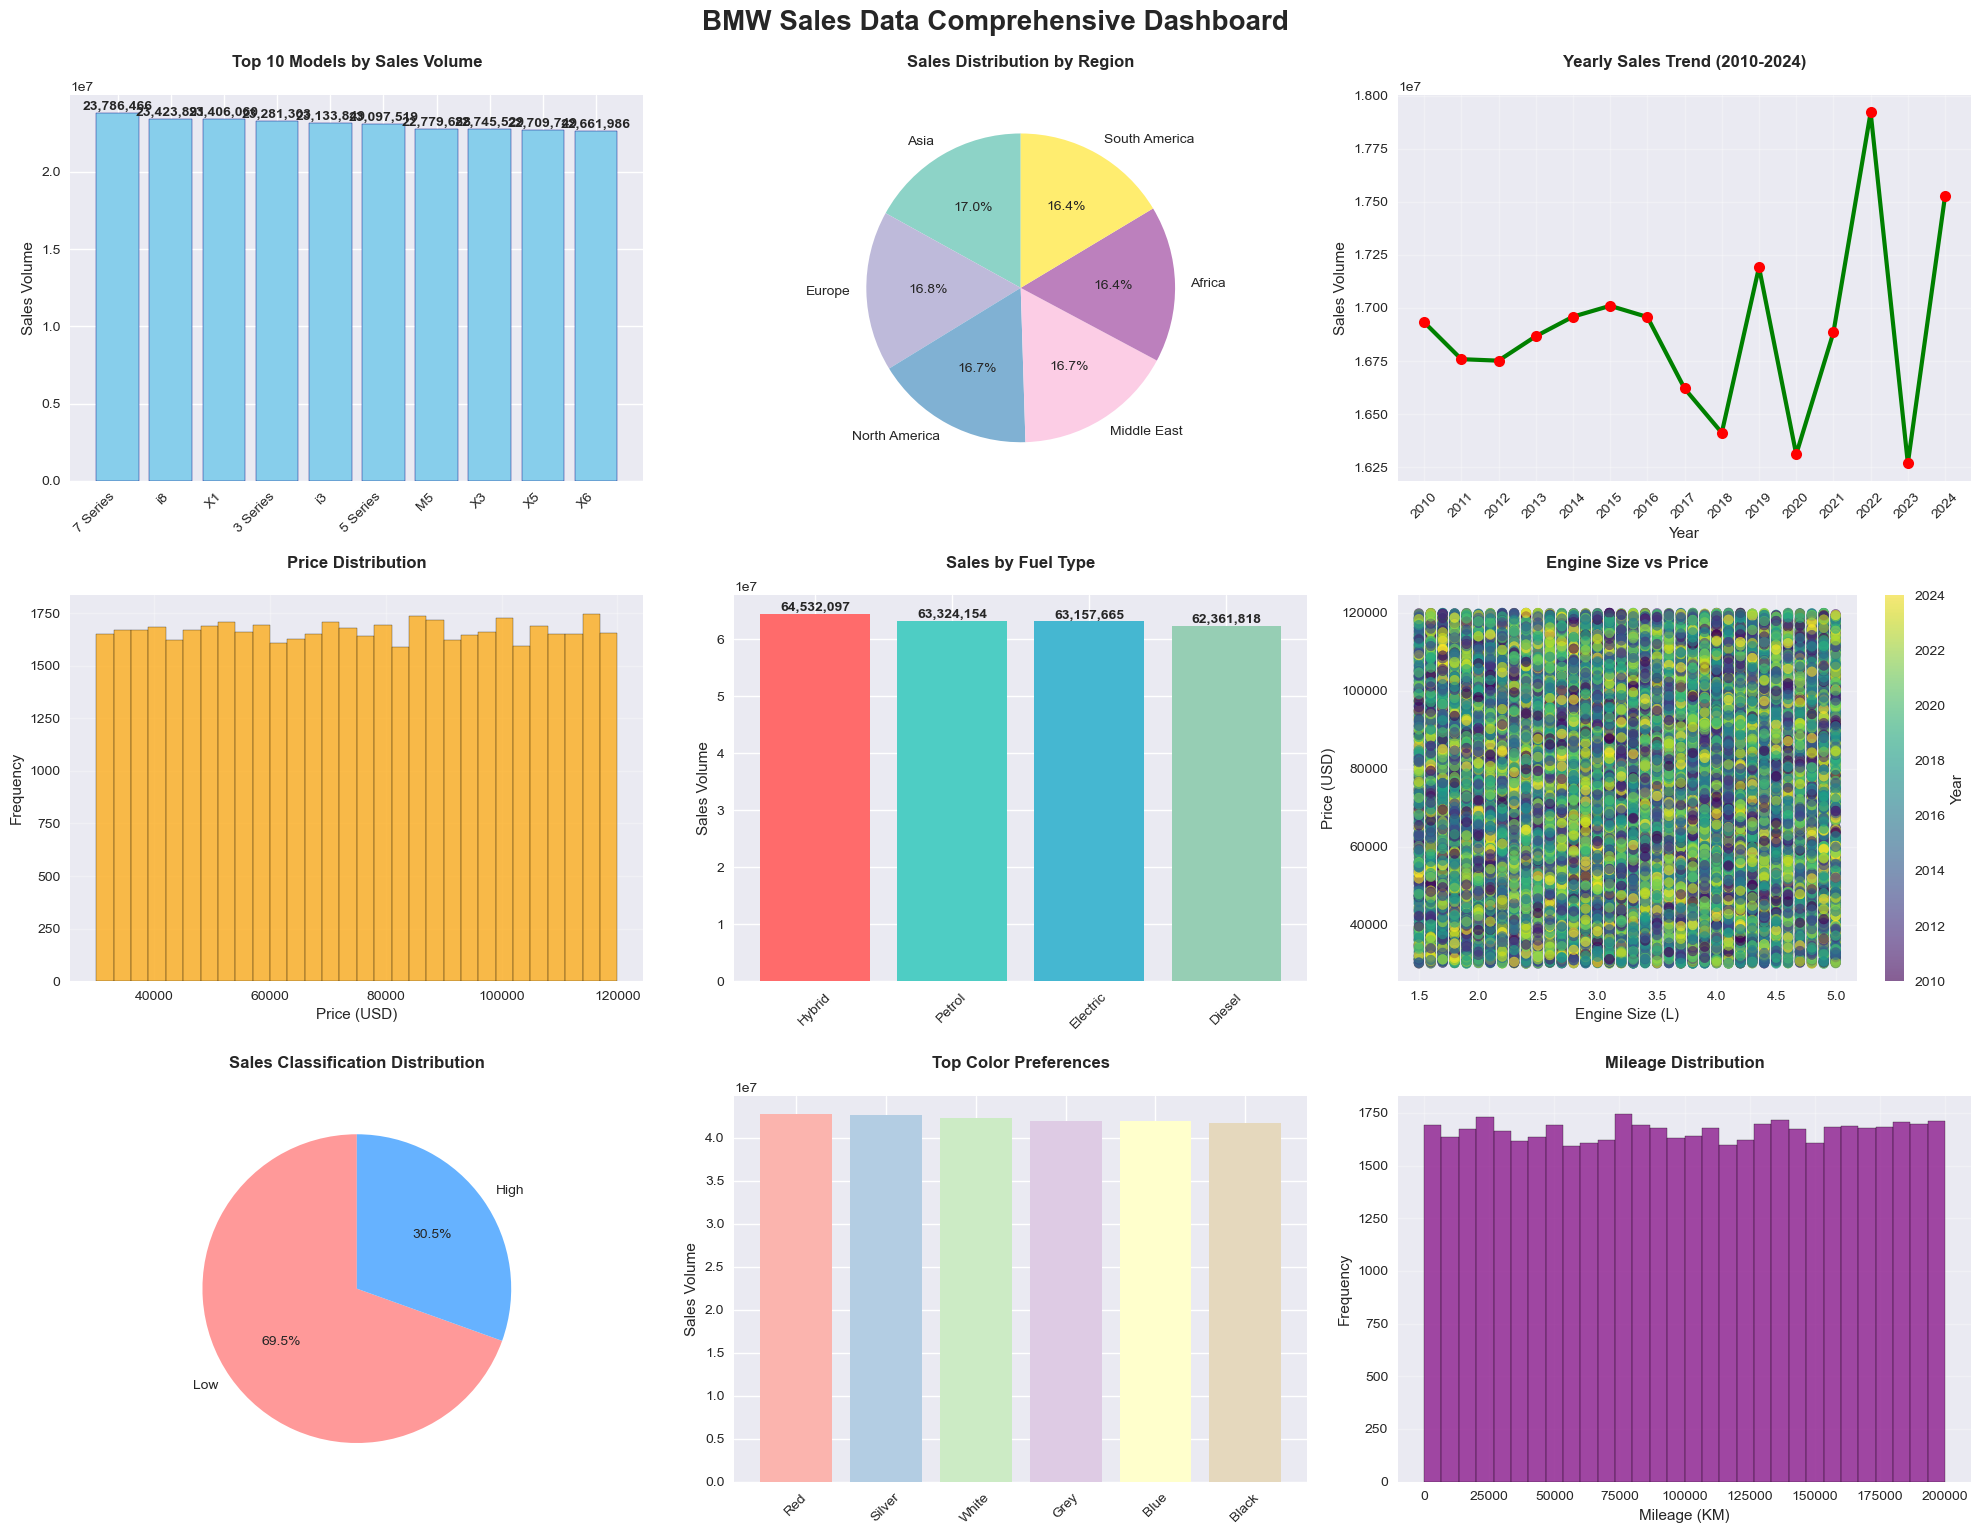

In [10]:
# VISUALIZATION SECTION
print("📊 CREATING VISUALIZATIONS...")

# Create comprehensive dashboard
plt.figure(figsize=(20, 15))

# 1. Sales by Model (Top 10)
plt.subplot(3, 3, 1)
top_models = model_sales.head(10)
bars = plt.bar(range(len(top_models)), top_models.values, color='skyblue', edgecolor='navy')
plt.title('Top 10 Models by Sales Volume', fontweight='bold', pad=20)
plt.xticks(range(len(top_models)), top_models.index, rotation=45, ha='right')
plt.ylabel('Sales Volume')
# Add value labels on bars
for bar, value in zip(bars, top_models.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:,}', 
             ha='center', va='bottom', fontweight='bold')

# 2. Sales by Region
plt.subplot(3, 3, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(region_sales)))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Sales Distribution by Region', fontweight='bold', pad=20)

# 3. Yearly Sales Trend
plt.subplot(3, 3, 3)
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=3, 
         markersize=8, color='green', markerfacecolor='red')
plt.title('Yearly Sales Trend (2010-2024)', fontweight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_sales.index, rotation=45)

# 4. Price Distribution
plt.subplot(3, 3, 4)
plt.hist(df['Price_USD'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Price Distribution', fontweight='bold', pad=20)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 5. Sales by Fuel Type
plt.subplot(3, 3, 5)
fuel_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
fuel_bars = plt.bar(range(len(fuel_sales)), fuel_sales.values, color=fuel_colors[:len(fuel_sales)])
plt.title('Sales by Fuel Type', fontweight='bold', pad=20)
plt.xticks(range(len(fuel_sales)), fuel_sales.index, rotation=45)
plt.ylabel('Sales Volume')
# Add value labels
for bar, value in zip(fuel_bars, fuel_sales.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:,}', 
             ha='center', va='bottom', fontweight='bold')

# 6. Engine Size vs Price
plt.subplot(3, 3, 6)
plt.scatter(df['Engine_Size_L'], df['Price_USD'], alpha=0.6, c=df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('Engine Size vs Price', fontweight='bold', pad=20)
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

# 7. Sales Classification Distribution
plt.subplot(3, 3, 7)
classification_count = df['Sales_Classification'].value_counts()
plt.pie(classification_count.values, labels=classification_count.index, autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Sales Classification Distribution', fontweight='bold', pad=20)

# 8. Color Preference
plt.subplot(3, 3, 8)
color_sales = df.groupby('Color')['Sales_Volume'].sum().sort_values(ascending=False)
color_bars = plt.bar(range(len(color_sales.head(8))), color_sales.head(8).values, 
                    color=plt.cm.Pastel1(np.linspace(0, 1, 8)))
plt.title('Top Color Preferences', fontweight='bold', pad=20)
plt.xticks(range(len(color_sales.head(8))), color_sales.head(8).index, rotation=45)
plt.ylabel('Sales Volume')

# 9. Mileage Distribution
plt.subplot(3, 3, 9)
plt.hist(df['Mileage_KM'], bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.title('Mileage Distribution', fontweight='bold', pad=20)
plt.xlabel('Mileage (KM)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('BMW Sales Data Comprehensive Dashboard', fontsize=20, fontweight='bold', y=1.02)
plt.show()


🔗 CORRELATION ANALYSIS


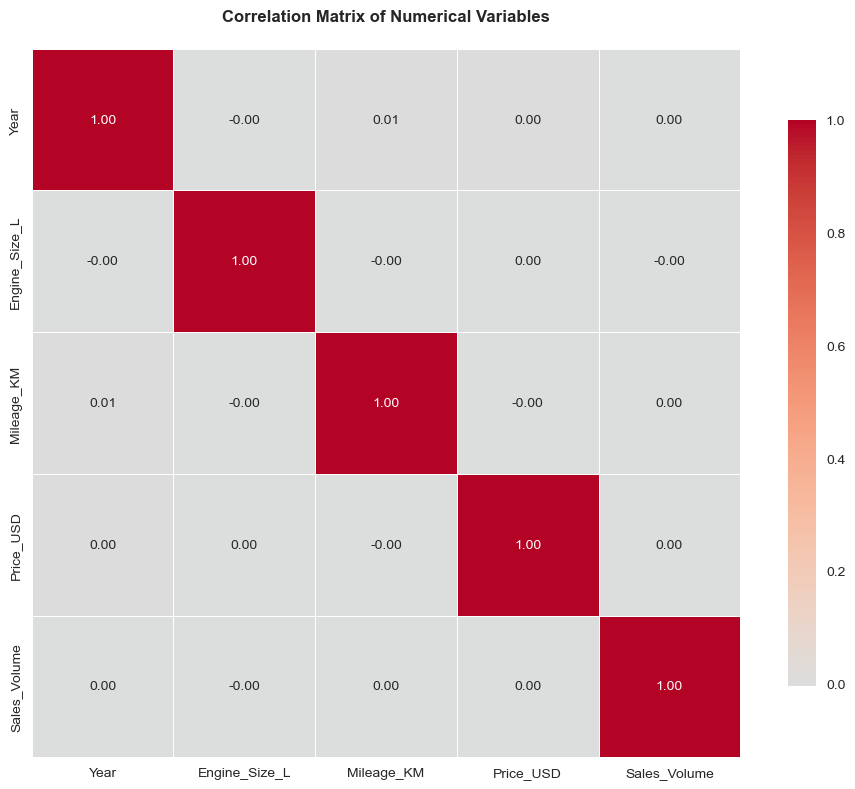

Correlation Matrix:
                Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Year           1.000         -0.002       0.009      0.004         0.002
Engine_Size_L -0.002          1.000      -0.005      0.000        -0.004
Mileage_KM     0.009         -0.005       1.000     -0.004         0.001
Price_USD      0.004          0.000      -0.004      1.000         0.000
Sales_Volume   0.002         -0.004       0.001      0.000         1.000



In [11]:
# CORRELATION ANALYSIS
print("\n" + "="*60)
print("🔗 CORRELATION ANALYSIS")

numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

print("\n" + "="*60)

📈 TREND ANALYSIS


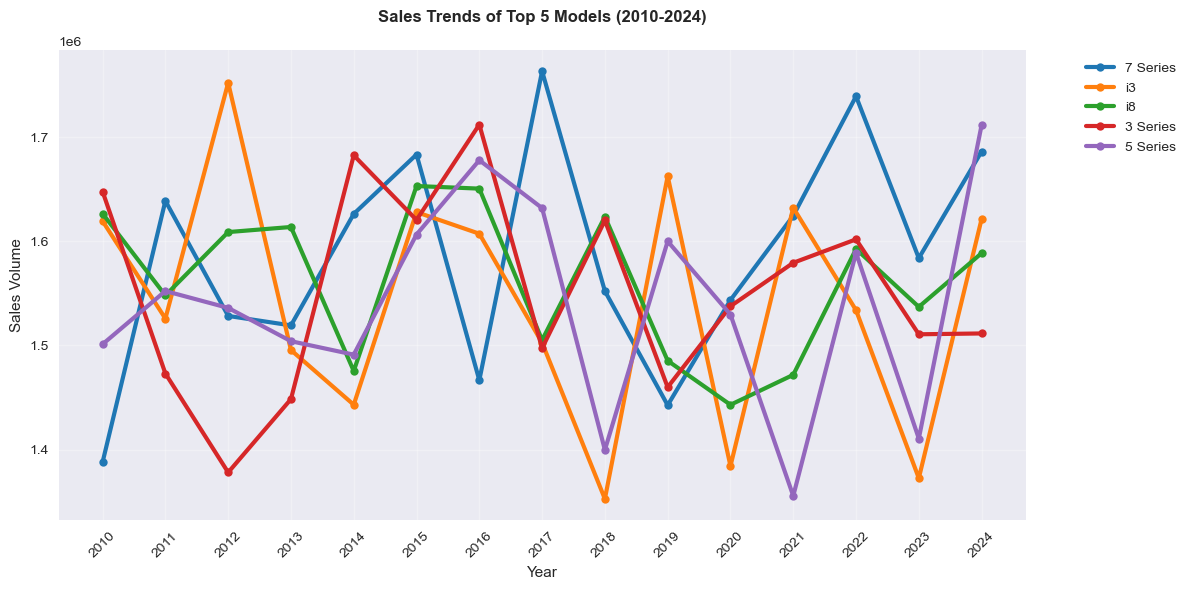

In [12]:
# TREND ANALYSIS
print("📈 TREND ANALYSIS")

# Model popularity over years
popular_models = df['Model'].value_counts().head(5).index
model_trends = df[df['Model'].isin(popular_models)].pivot_table(
    index='Year', columns='Model', values='Sales_Volume', aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, model in enumerate(popular_models):
    plt.plot(model_trends.index, model_trends[model], marker='o', label=model, 
             linewidth=3, markersize=6, color=colors[i])

plt.title('Sales Trends of Top 5 Models (2010-2024)', fontweight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(model_trends.index, rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# ADVANCED INSIGHTS
print("\n" + "="*60)
print("💡 ADVANCED INSIGHTS")

# High vs Low sales analysis
high_sales = df[df['Sales_Classification'] == 'High']
low_sales = df[df['Sales_Classification'] == 'Low']

print(f"📊 High Sales entries: {len(high_sales):,}")
print(f"📊 Low Sales entries: {len(low_sales):,}")

print(f"\n💰 Average price - High sales: ${high_sales['Price_USD'].mean():,.2f}")
print(f"💰 Average price - Low sales: ${low_sales['Price_USD'].mean():,.2f}")
price_diff = high_sales['Price_USD'].mean() - low_sales['Price_USD'].mean()
print(f"💰 Price difference: ${price_diff:,.2f}")

print(f"\n🛣️ Average mileage - High sales: {high_sales['Mileage_KM'].mean():,.0f} KM")
print(f"🛣️ Average mileage - Low sales: {low_sales['Mileage_KM'].mean():,.0f} KM")
mileage_diff = high_sales['Mileage_KM'].mean() - low_sales['Mileage_KM'].mean()
print(f"🛣️ Mileage difference: {mileage_diff:,.0f} KM")

# Regional preferences
print("\n🌎 Top Model in each Region:")
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    top_model = region_data.groupby('Model')['Sales_Volume'].sum().idxmax()
    total_sales = region_data['Sales_Volume'].sum()
    print(f"  {region:20} → {top_model:15} ({total_sales:>8,} units)")

print("\n" + "="*60)

# SUMMARY AND CONCLUSIONS
print("🎯 KEY FINDINGS AND CONCLUSIONS")

print("\n1. 🚀 SALES PERFORMANCE:")
print(f"   • Total sales volume: {df['Sales_Volume'].sum():,} units")
best_year = yearly_sales.idxmax()
print(f"   • Best performing year: {best_year} with {yearly_sales.max():,} units")
print(f"   • Top selling model: {model_sales.index[0]} with {model_sales.iloc[0]:,} units")

print("\n2. 💰 PRICING INSIGHTS:")
print(f"   • Average vehicle price: ${df['Price_USD'].mean():,.2f}")
print(f"   • Price range: ${df['Price_USD'].min():,.2f} - ${df['Price_USD'].max():,.2f}")
print(f"   • Most expensive model: {price_by_model.index[0]} at ${price_by_model.iloc[0]:,.2f}")

print("\n3. 🌍 MARKET PREFERENCES:")
print(f"   • Most popular fuel type: {fuel_sales.index[0]}")
print(f"   • Preferred transmission: {transmission_sales.index[0]}")
print(f"   • Top region: {region_sales.index[0]} with {region_sales.iloc[0]:,} units")
print(f"   • Most popular color: {color_sales.index[0]}")

print("\n4. 📊 SALES CLASSIFICATION:")
print(f"   • High sales vehicles: {len(high_sales):,}")
print(f"   • Low sales vehicles: {len(low_sales):,}")
print(f"   • High sales vehicles are typically ${price_diff:,.2f} {'more' if price_diff > 0 else 'less'} expensive")

print("\n5. 🔗 CORRELATION INSIGHTS:")
corr_engine_price = correlation_matrix.loc['Engine_Size_L', 'Price_USD']
corr_mileage_price = correlation_matrix.loc['Mileage_KM', 'Price_USD']
print(f"   • Engine Size vs Price correlation: {corr_engine_price:.3f} ({'Strong' if abs(corr_engine_price) > 0.5 else 'Moderate' if abs(corr_engine_price) > 0.3 else 'Weak'} {'positive' if corr_engine_price > 0 else 'negative'})")
print(f"   • Mileage vs Price correlation: {corr_mileage_price:.3f} ({'Strong' if abs(corr_mileage_price) > 0.5 else 'Moderate' if abs(corr_mileage_price) > 0.3 else 'Weak'} {'positive' if corr_mileage_price > 0 else 'negative'})")

print("\n6. 📈 TREND INSIGHTS:")
sales_growth = ((yearly_sales.iloc[-1] - yearly_sales.iloc[0]) / yearly_sales.iloc[0]) * 100
print(f"   • Overall sales growth (2010-2024): {sales_growth:+.1f}%")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)


💡 ADVANCED INSIGHTS
📊 High Sales entries: 15,246
📊 Low Sales entries: 34,754

💰 Average price - High sales: $74,966.82
💰 Average price - Low sales: $75,064.34
💰 Price difference: $-97.52

🛣️ Average mileage - High sales: 100,883 KM
🛣️ Average mileage - Low sales: 100,055 KM
🛣️ Mileage difference: 828 KM

🌎 Top Model in each Region:
  Asia                 → X1              (42,974,277 units)
  North America        → 7 Series        (42,402,629 units)
  Middle East          → 7 Series        (42,326,620 units)
  South America        → X6              (41,551,818 units)
  Europe               → i8              (42,555,138 units)
  Africa               → 5 Series        (41,565,252 units)

🎯 KEY FINDINGS AND CONCLUSIONS

1. 🚀 SALES PERFORMANCE:
   • Total sales volume: 253,375,734 units
   • Best performing year: 2022 with 17,920,946 units
   • Top selling model: 7 Series with 23,786,466 units

2. 💰 PRICING INSIGHTS:
   • Average vehicle price: $75,034.60
   • Price range: $30,000.00 - $1